In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

def rgbImg(img):
    result = 0
    try:
        result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except:
        result = img
    return result


def grayImg(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def cv2_show(img, arg):
    while(True):
        if arg == 'gray':
            cv2.imshow('img', grayImg(img))
        else:
            cv2.imshow('img', img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

    
def plt_show(img, arg=None):
    %matplotlib inline
    if arg == 'gray':
        plt.imshow(grayImg(img), 'gray')
        #plt.show()
    else:
        plt.imshow(rgbImg(img))
    plt.show()

    
def getImg(path):
    img = cv2.imread(path)
    if img is None:
        raise RuntimeError('Can not read img from the path.')
    return img


def normalize(img):
    img_back = img.copy()
    cv2.normalize(img, img_back, 0, 255, cv2.NORM_MINMAX)
    return img_back


def resize(img, size):
    if not isinstance(img, np.ndarray):
        raise TypeError('Input image type is not numpy.ndarray.')
    elif not isinstance(size, tuple):
        raise TypeError('Input size type is not tuple.')
    elif len(size) > 2 or len(size)< 2:
        raise ValueError('Input size is invalid.')
    return cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)


def opening_evalution(img, kernel, iterations):
    target = cv2.erode(img, None, iterations)
    return cv2.dilate(target, None, iterations)


def closing_evalution(img, kernel, iterations):
    target = cv2.dilate(img, None, iterations)
    return cv2.erode(target, None, iterations)


def findContours(origin, img):
    # find contours and draw to pad
    (contours, _) = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    copy = origin.copy()
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    count = 0
    for cnt in contours:
        if count == 0:
            print cv2.contourArea(cnt)
            rect = cv2.minAreaRect(cnt)
            box = np.int0(cv2.cv.BoxPoints(rect))
            cv2.drawContours(copy, [box], -1, (255, 0, 0), 1)
        else:
            print cv2.contourArea(cnt)
            rect = cv2.minAreaRect(cnt)
            box = np.int0(cv2.cv.BoxPoints(rect))
            cv2.drawContours(copy, [box], -1, (0, 0, 255), 1)
        count += 1

    plt.imshow(rgbImg(copy))
    plt.show()

    
def checkShape(img):
    gray = grayImg(img)
    bl = cv2.bilateralFilter(gray,7,50,50)

    op_im = opening_evalution(bl, None, 10)
    clo_im = closing_evalution(op_im, None, 10)

    canny = cv2.Canny(clo_im,100,150)
    plt.imshow(canny, 'gray')
    plt.show()

    findContours(img, canny)

    
def edgeDetect(img):
    gray = grayImg(img)
    bl = cv2.bilateralFilter(gray,11,50,50)
    op_im = opening_evalution(bl, None, 10)
    clo_im = closing_evalution(op_im, None, 10)
    canny = cv2.Canny(clo_im,100,150)
    plt.imshow(canny, 'gray')
    plt.show()

    cnts, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    approx_area = 0.0
    hull_area = 0.0
    for c in cnts:
        window = np.zeros((80,80), dtype = np.uint8)
        approx = cv2.approxPolyDP(c, 5, True)
        cv2.drawContours(img, [approx], 0, (0,255,0), 1)
        #approx_area = approx_area + cv2.contourArea(approx)

        #hull =  cv2.convexHull(c)
        #cv2.drawContours(img, [hull], 0, (0,0,255), 1)
        #hull_area = hull_area + cv2.contourArea(hull)
        
    plt_show(img, 'color')
    #print 'approx_area', approx_area
    #print 'hull_area', hull_area
    #error_area = (hull_area - approx_area)/hull_area*100
    #print 'error_area', error_area, '%'

    
def Sobel(gray):
    x = cv2.Sobel(gray,-1,1,0)  
    y = cv2.Sobel(gray,-1,0,1)  

    absX = cv2.convertScaleAbs(x)   # 转回uint8  
    absY = cv2.convertScaleAbs(y)  
    sobel = cv2.addWeighted(absX,0.5,absY,0.5,0)
    return sobel

img.shape: (80L, 80L, 3L)


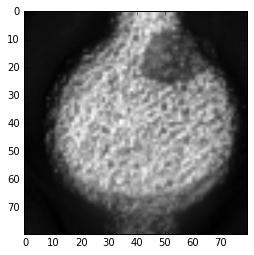

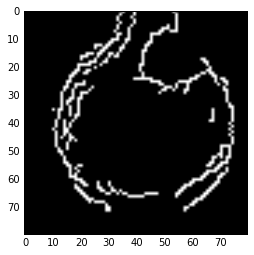

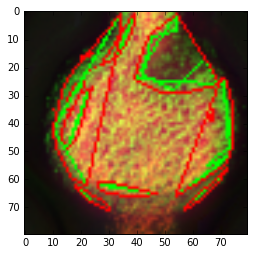

approx_area 110.5
hull_area 1878.5
error_area 94.1176470588 %


In [259]:
#TESTING CODE

img = getImg('S0[ 2782.60958439  5003.55680862]', 'bad')
gray = grayImg(img)
bl = cv2.bilateralFilter(gray,9,50,50)
#op_im = opening_evalution(bl, None, 3)
#clo_im = closing_evalution(op_im, None, 3)

canny = cv2.Canny(bl,100,150)
# = cv2.minAreaRect(canny)
plt.imshow(canny, 'gray')
plt.show()

cnts, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
approx_area = 0.0
hull_area = 0.0
approx_list =[]
for c in cnts:
    #x,y,w,h = cv2.boundingRect(c)
    #cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 1)

    approx = cv2.approxPolyDP(c, 5, False)
    approx_list.append(approx)
    cv2.drawContours(img, [approx], 0, (0,255,0), 1)
    approx_area = approx_area + cv2.contourArea(approx)
    
    hull =  cv2.convexHull(c)
    cv2.drawContours(img, [hull], 0, (0,0,255), 1)
    hull_area = hull_area + cv2.contourArea(hull)

plt_show(img, 'color')
print 'approx_area', approx_area
print 'hull_area', hull_area

error_area = (hull_area - approx_area)/hull_area*100
print 'error_area', error_area, '%'

In [2]:
# work flow
def autoDetectEdge(img):
    pad = img
    # split the region to an new window
    window = np.zeros((80,80,3), dtype = np.uint8)
    window = pad
    window = cv2.cvtColor(window,cv2.COLOR_BGR2GRAY)

    # blur
    bl = cv2.bilateralFilter(window,5,50,50)
    #bl = cv2.medianBlur(window, 7)
    print 'bilateralFilter:'
    plt.imshow(bl,'gray')
    plt.show()
    
    # threshold
    ret,output = cv2.threshold(bl,100,255,cv2.THRESH_BINARY)
    print 'threshold:'
    plt.imshow(output,'gray')
    plt.show()
    

    # erosion & dilation for clean up the image
    target = cv2.dilate(output, None, 7)
    output = cv2.erode(target, None, 5)
    #op = opening_evalution(output, None, 1)
    #output = closing_evalution(op, None, 2)
    print 'erosion & dilation'
    plt.imshow(output, 'gray')
    plt.show()

    # find contours and draw to pad
    (cnts, _) = cv2.findContours(output.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    copy = pad.copy()
    c = sorted(cnts, key = cv2.contourArea, reverse = True)
    count = 0
    pad_cnt = 0
    for cnt in c:
        if count == 0:
            #circle label:
            (x,y),radius = cv2.minEnclosingCircle(cnt)
            center = (int(x),int(y))
            radius = int(radius)
            cv2.circle(copy,center,radius,(255,0,0),1)
            
            #Rect box label:
            #rect = cv2.minAreaRect(cnt)
            #box = np.int0(cv2.cv.BoxPoints(rect))
            #cv2.drawContours(copy, [box], -1, (255, 0, 0), 1)
            pad_cnt = cnt
            
        else:
            #circle label:
            (x,y),radius = cv2.minEnclosingCircle(cnt)
            center = (int(x),int(y))
            radius = int(radius)
            cv2.circle(copy,center,radius,(0,0,255),1)
            
            #Rect box label:
            #rect = cv2.minAreaRect(cnt)
            #box = np.int0(cv2.cv.BoxPoints(rect))
            #cv2.drawContours(copy, [box], -1, (0, 0, 255), 1)
        count += 1
    
    print 'find contours:'
    plt.imshow(rgbImg(copy))
    plt.show()
    
    copy = pad.copy()
    hull = cv2.convexHull(pad_cnt)
    cv2.drawContours(copy, [hull], -1, (0, 255, 0), 1)
    hull_area = cv2.contourArea(hull)
    print 'convex hull(green):'
    print 'hull_area:',hull_area
    #plt.imshow(rgbImg(copy))
    #plt.show()
    
    #copy = pad.copy()
    epsilon = 0.01 * cv2.arcLength(pad_cnt, False)
    approx = cv2.approxPolyDP(pad_cnt, epsilon, False)
    cv2.drawContours(copy, [approx], -1, (255, 0, 255), 1)
    approx_area = cv2.contourArea(approx)
    print 'approx polyDP(pink):'
    print 'approx_area:', approx_area
    plt.imshow(rgbImg(copy))
    plt.show()    
    
    err_area = (hull_area - approx_area)/approx_area*100
    print 'error_area:',err_area, '%'
    if err_area >= 11:
        print 'detection result: BAD'
    else:
        print 'detection result: GOOD'

img.shape: (80L, 80L, 3L)
gray scale:


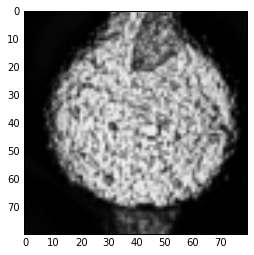

bilateralFilter:


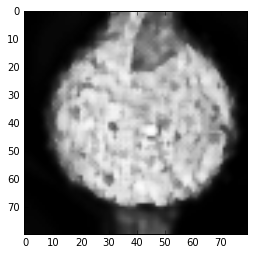

threshold:


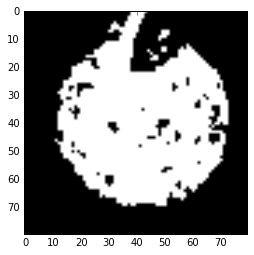

erosion & dilation


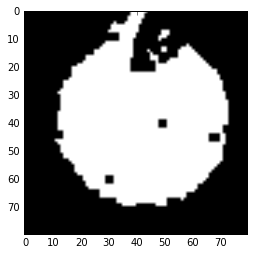

find contours:


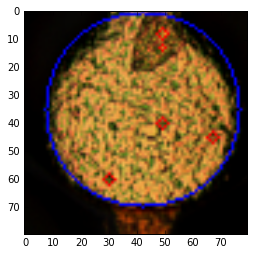

convex hull(green):
hull_area: 3120.0
approx polyDP(pink):
approx_area: 2769.5


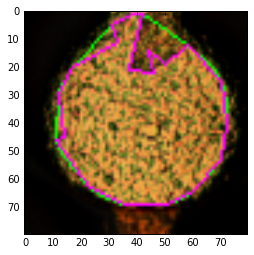

error_area: 12.6557140278 %
detection result: BAD


In [117]:
img = getImg('S1[ 6460.0088283   1981.53878326]', 'bad')
autoDetectEdge(img)


img.shape: (80L, 80L, 3L)
gray scale:


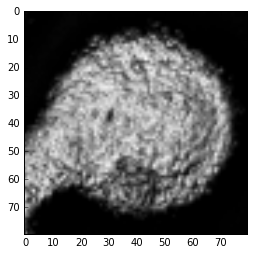

bilateralFilter:


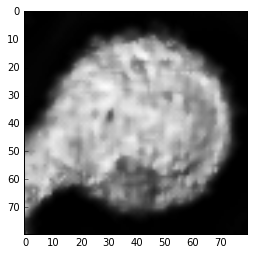

threshold:


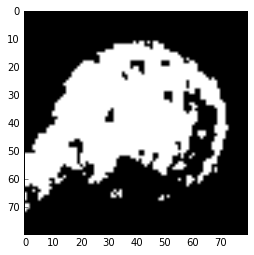

erosion & dilation


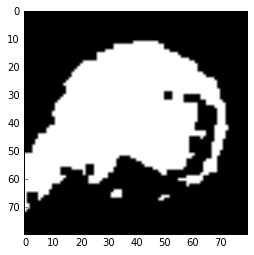

find contours:


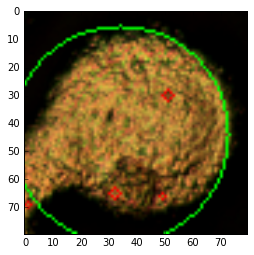

convex hull:
hull_area: 3010.5


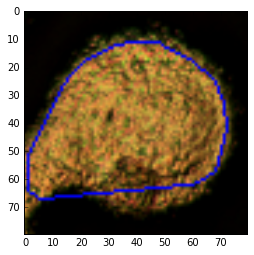

approx polyDP:
approx_area: 2148.0


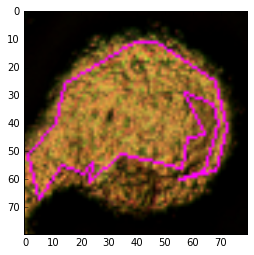

error_area: 40.1536312849 %
detection result: BAD


In [99]:
img = getImg('S1[ 7539.80208394  1863.7478055 ]', 'bad')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


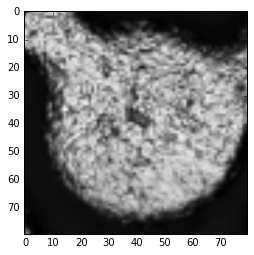

bilateralFilter:


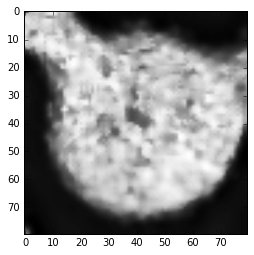

threshold:


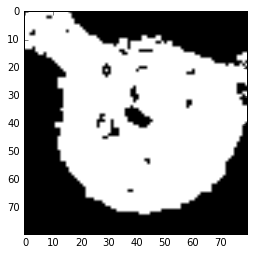

erosion & dilation


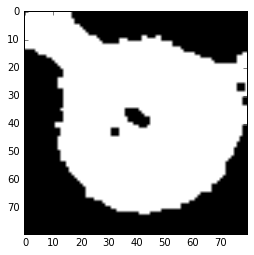

find contours:


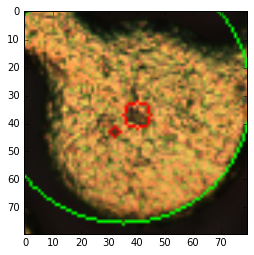

convex hull:
hull_area: 4133.0


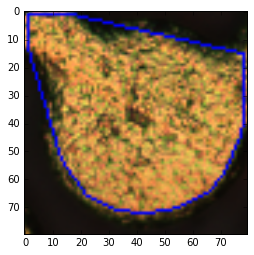

approx polyDP:
approx_area: 3601.0


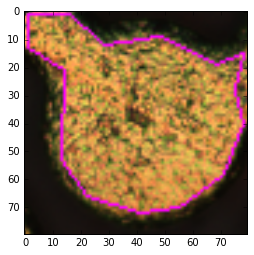

error_area: 14.7736739795 %
detection result: BAD


In [100]:
img = getImg('S1[ 1163.28116681  2299.54936549]','bad')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


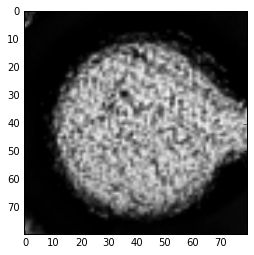

bilateralFilter:


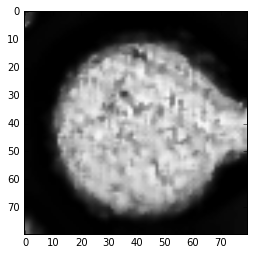

threshold:


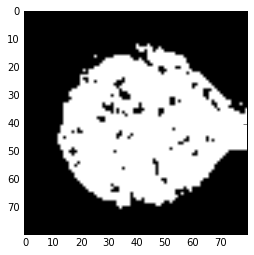

erosion & dilation


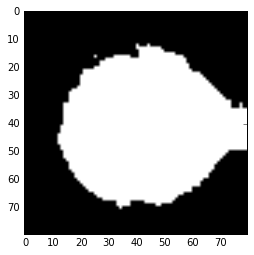

find contours:


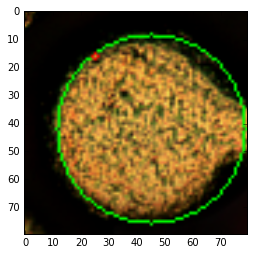

convex hull:
hull_area: 2816.5


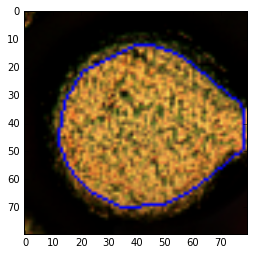

approx polyDP:
approx_area: 2640.0


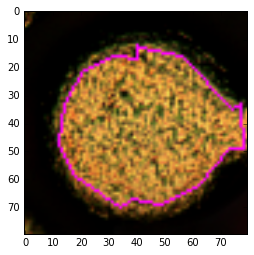

error_area: 6.68560606061 %
detection result: GOOD


In [101]:
img = getImg('[ 7800.2406936   8271.96757166]','bad')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


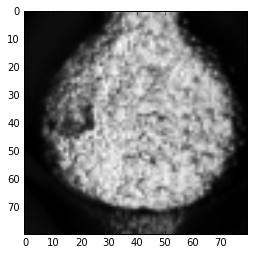

bilateralFilter:


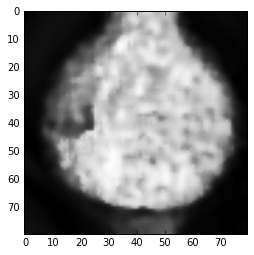

threshold:


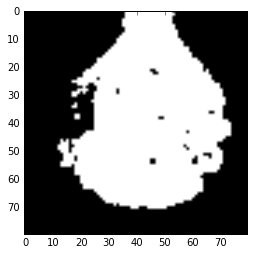

erosion & dilation


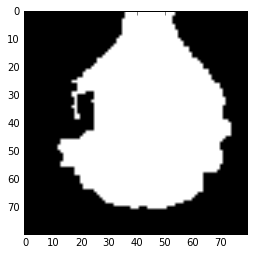

find contours:


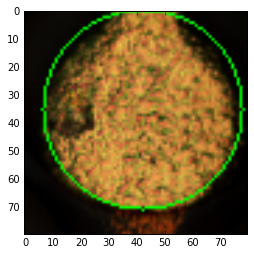

convex hull:
hull_area: 3161.0


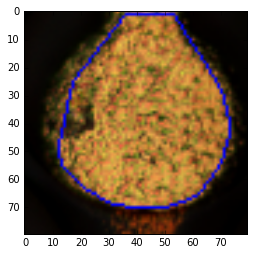

approx polyDP:
approx_area: 2761.5


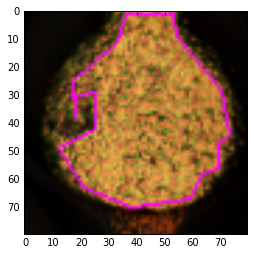

error_area: 14.4667753033 %
detection result: BAD


In [102]:
img = getImg('S1[ 3681.65259879  4283.40496961]','bad')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


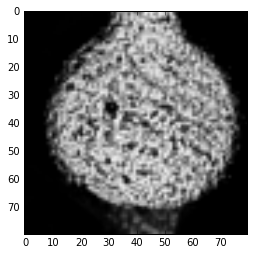

bilateralFilter:


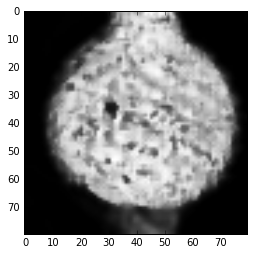

threshold:


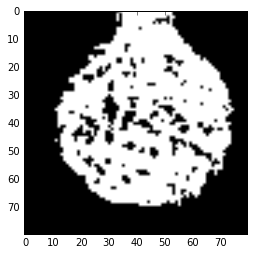

erosion & dilation


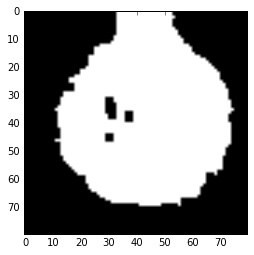

find contours:


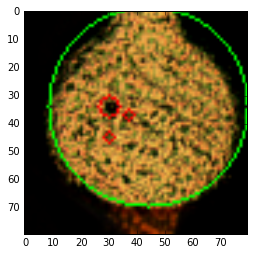

convex hull:
hull_area: 3288.0


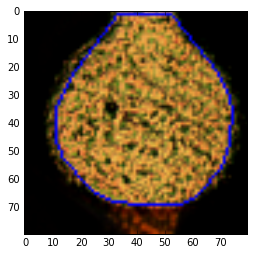

approx polyDP:
approx_area: 3048.5


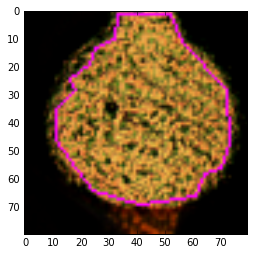

error_area: 7.8563227817 %
detection result: GOOD


In [103]:
img = getImg('S1[ 3902.89215345  4956.41025888]','bad')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


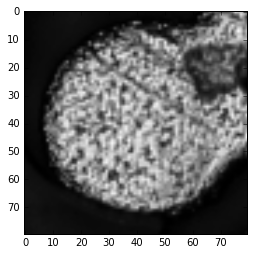

bilateralFilter:


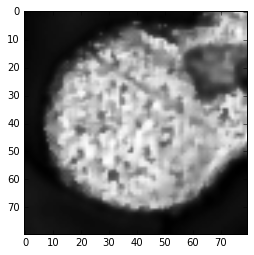

threshold:


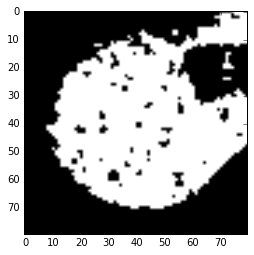

erosion & dilation


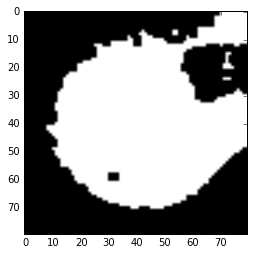

find contours:


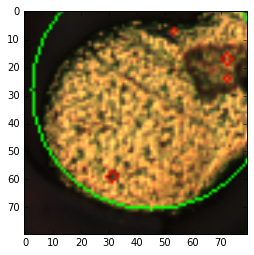

convex hull:
hull_area: 3732.0


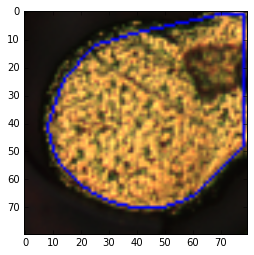

approx polyDP:
approx_area: 3055.5


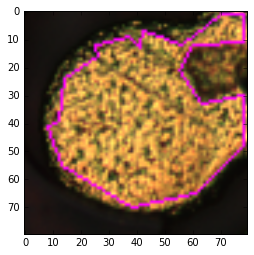

error_area: 22.1404025528 %
detection result: BAD


In [104]:
img = getImg('S1[ 1499.21512486  1167.19162389]','bad')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


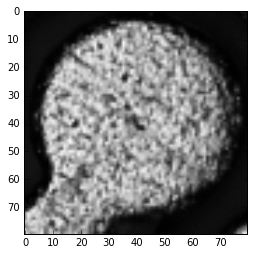

bilateralFilter:


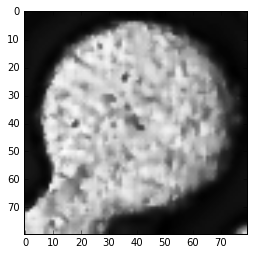

threshold:


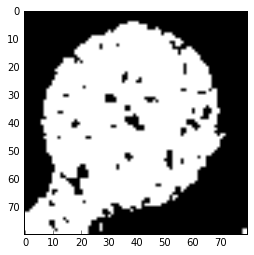

erosion & dilation


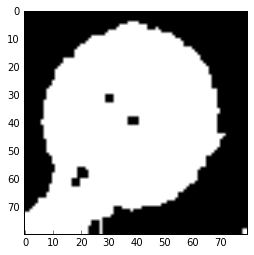

find contours:


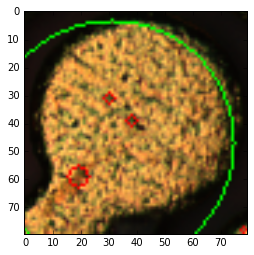

convex hull:
hull_area: 3828.0


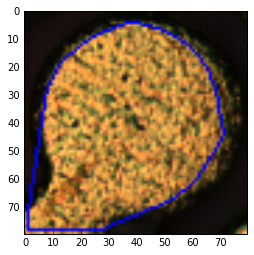

approx polyDP:
approx_area: 3467.0


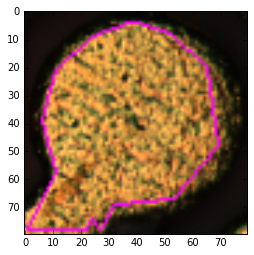

error_area: 10.4124603404 %
detection result: GOOD


In [105]:
img = getImg('[ 5639.04441588  1079.2041277 ]','bad')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


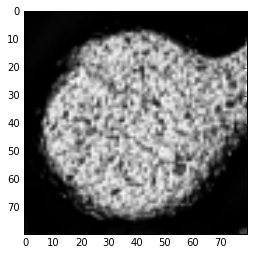

bilateralFilter:


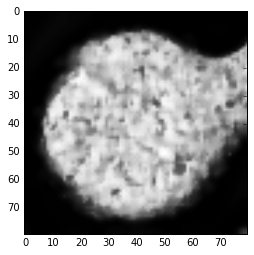

threshold:


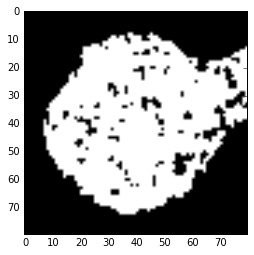

erosion & dilation


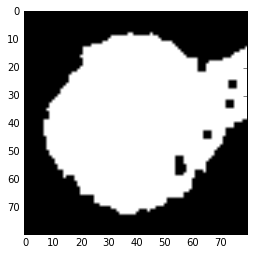

find contours:


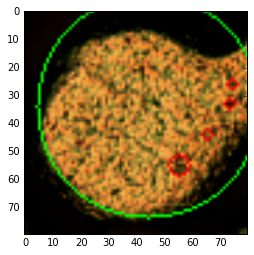

convex hull:
hull_area: 3470.5


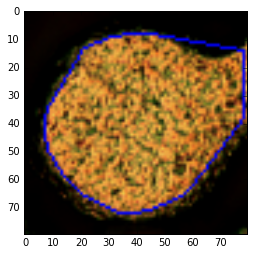

approx polyDP:
approx_area: 3112.5


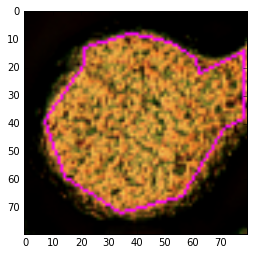

error_area: 11.5020080321 %
detection result: BAD


In [106]:
img = getImg('[  910.24876913  6135.92075236]','good')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


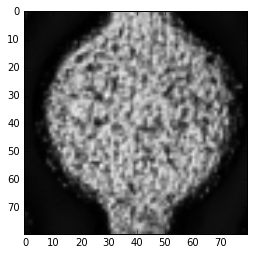

bilateralFilter:


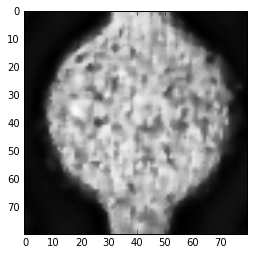

threshold:


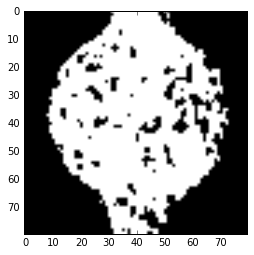

erosion & dilation


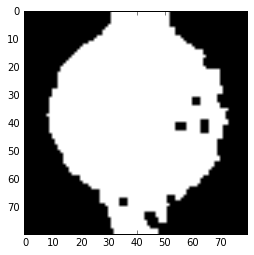

find contours:


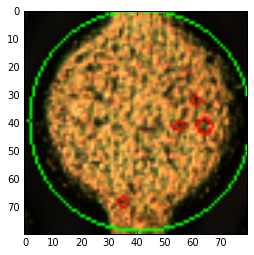

convex hull:
hull_area: 3612.0


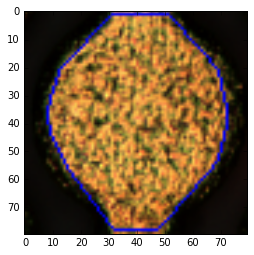

approx polyDP:
approx_area: 3331.5


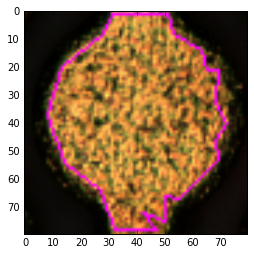

error_area: 8.41963079694 %
detection result: GOOD


In [107]:
img = getImg('[ 1027.67553024  1014.02658625]','good')
autoDetectEdge(img)

img.shape: (80L, 80L, 3L)
gray scale:


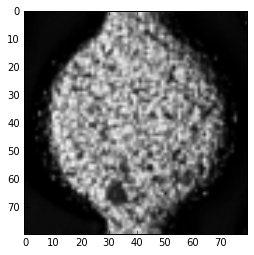

bilateralFilter:


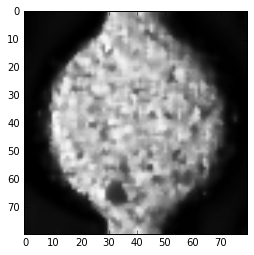

threshold:


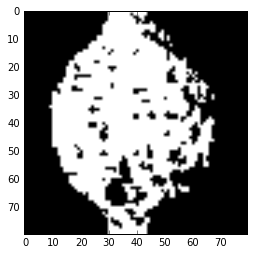

erosion & dilation


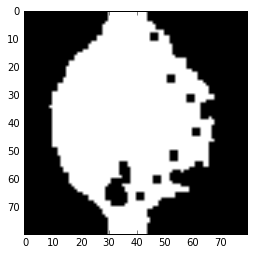

find contours:


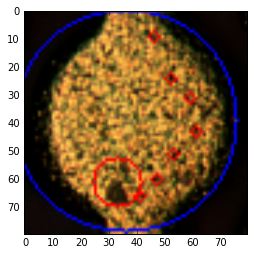

convex hull(green):
hull_area: 3271.5
approx polyDP(pink):
approx_area: 2969.0


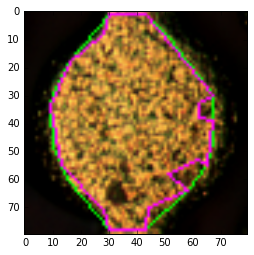

error_area: 10.1886156955 %
detection result: GOOD


In [122]:
img = getImg('[  804.09844197  2622.09484754]','bad')
autoDetectEdge(img)

In [168]:
# 批量處理
import os

#path_list = []
save_path = '\\\\192.168.1.192\\Vision\\shape_info\\'
li = os.walk('\\\\192.168.1.192\\Vision\\labeled_data\\20X_image\\bad\\')
for root, dirs, files in li:
    for fi in files:
        path = os.path.join(root, fi)
        #path_list.append(path)

#for path in path_list:
        img = cv2.imread(path)

        gray = grayImg(img)
        bl = cv2.bilateralFilter(gray,11,50,50)
        op_im = opening_evalution(bl, None, 10)
        clo_im = closing_evalution(op_im, None, 10)
        canny = cv2.Canny(clo_im,100,150)

        cnts, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        window = np.zeros((80,80,3), dtype = np.uint8)

        for c in cnts:    
            approx = cv2.approxPolyDP(c, 5, True)
            cv2.drawContours(window, [approx], 0, (0,255,0), 1)
            cv2.drawContours(img, [approx], 0, (0,255,0), 1)
        
        filename = path.split('\\')[-1]
        shape_filename = filename[:-4] + 'shape.bmp'
        cv2.imwrite( os.path.join(save_path, shape_filename), window)
        
        img_filename = filename[:-4] + 'image.bmp'
        cv2.imwrite( os.path.join(save_path, img_filename), img)

In [126]:
# 批量處理
import os

save_bad_path = '\\\\192.168.1.192\\Vision\\shape_info\\good_shapeBad\\'
save_good_path = '\\\\192.168.1.192\\Vision\\shape_info\\good_shapeGood\\'
li = os.walk('\\\\192.168.1.192\\Vision\\labeled_data\\20X_image\\good\\')
for root, dirs, files in li:
    for fi in files:
        path = os.path.join(root, fi)
        img = cv2.imread(path)
        
        # gray scale
        gray = grayImg(img)

        # blur
        bl = cv2.bilateralFilter(gray,5,50,50)

        # threshold
        ret,output = cv2.threshold(bl,100,255,cv2.THRESH_BINARY)

        # erosion & dilation for clean up the image
        target = cv2.dilate(output, None, 7)
        output = cv2.erode(target, None, 5)

        # find contours
        (cnts, hierarchy) = cv2.findContours(output.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        copy = img.copy()
        c = sorted(cnts, key = cv2.contourArea, reverse = True)
        pad_cnt = c[0]

        # prepare to save files
        copy = img.copy()
        window = np.zeros((80,80,3), dtype = np.uint8)
        
        # covex hull
        hull = cv2.convexHull(pad_cnt)
        cv2.drawContours(copy, [hull], -1, (0, 255, 0), 1)
        hull_area = cv2.contourArea(hull)

        # approx polyDP
        epsilon = 0.01 * cv2.arcLength(pad_cnt, False)
        approx = cv2.approxPolyDP(pad_cnt, epsilon, False)
        cv2.drawContours(copy, [approx], -1, (255, 0, 255), 1)
        cv2.drawContours(window, [approx], -1, (255, 0, 255), 1)
        approx_area = cv2.contourArea(approx)

        # judgement & saving
        err_area = (hull_area - approx_area)/approx_area*100
        
        filename = path.split('\\')[-1]
        shape_filename = filename[:-4] + 'shape.bmp'
        img_filename = filename[:-4] + 'image.bmp'
        message = filename[:-4] + ',' + str(round(err_area, 2)) + '% ' + '\n'
        
        if err_area >= 11:
            #print 'detection result: BAD'
            cv2.imwrite( os.path.join(save_bad_path, shape_filename), window)
            cv2.imwrite( os.path.join(save_bad_path, img_filename), copy)
            csv_bad_path = save_bad_path + 'err_bad_area.csv'
            with open(csv_bad_path , 'a') as f:
                f.write(message)
            
        else:
            #print 'detection result: GOOD'
            cv2.imwrite( os.path.join(save_good_path, shape_filename), window)
            cv2.imwrite( os.path.join(save_good_path, img_filename), copy)
            csv_good_path = save_good_path + 'err_good_area.csv'
            with open(csv_good_path , 'a') as f:
                f.write(message)            

In [14]:
# work flow
def grab_img(img):
    pad = img
    # split the region to an new window
    window = np.zeros((80,80,3), dtype = np.uint8)
    window = pad
    window = cv2.cvtColor(window,cv2.COLOR_BGR2GRAY)

    # blur
    bl = cv2.bilateralFilter(window,5,50,50)
    #bl = cv2.medianBlur(window, 7)
    print 'bilateralFilter:'
    plt.imshow(bl,'gray')
    plt.show()
    
    # threshold
    ret,output = cv2.threshold(bl,100,255,cv2.THRESH_BINARY)
    print 'threshold:'
    plt.imshow(output,'gray')
    plt.show()
    

    # erosion & dilation for clean up the image
    target = cv2.dilate(output, None, 7)
    output = cv2.erode(target, None, 5)
    #op = opening_evalution(output, None, 1)
    #output = closing_evalution(op, None, 2)
    print 'erosion & dilation'
    plt.imshow(output, 'gray')
    plt.show()

    # find contours and draw to pad
    (cnts, _) = cv2.findContours(output.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    copy = pad.copy()
    c = sorted(cnts, key = cv2.contourArea, reverse = True)
    count = 0
    pad_cnt = 0
    for cnt in c:
        if count == 0:
            #circle label:
            (x,y),radius = cv2.minEnclosingCircle(cnt)
            center = (int(x),int(y))
            radius = int(radius)
            cv2.circle(copy,center,radius,(255,0,0),1)
            
            #Rect box label:
            #rect = cv2.minAreaRect(cnt)
            #box = np.int0(cv2.cv.BoxPoints(rect))
            #cv2.drawContours(copy, [box], -1, (255, 0, 0), 1)
            pad_cnt = cnt
            
        else:
            #circle label:
            (x,y),radius = cv2.minEnclosingCircle(cnt)
            center = (int(x),int(y))
            radius = int(radius)
            cv2.circle(copy,center,radius,(0,0,255),1)
            
            #Rect box label:
            #rect = cv2.minAreaRect(cnt)
            #box = np.int0(cv2.cv.BoxPoints(rect))
            #cv2.drawContours(copy, [box], -1, (0, 0, 255), 1)
        count += 1
    
    print 'find contours:'
    plt.imshow(rgbImg(copy))
    plt.show()

    copy = pad.copy()
    hull = cv2.convexHull(pad_cnt)
    cv2.drawContours(copy, [hull], -1, (0, 255, 0), 1)
    hull_area = cv2.contourArea(hull)
    print 'convex hull(green):'
    print 'hull_area:',hull_area
    #plt.imshow(rgbImg(copy))
    #plt.show()
    
    #copy = pad.copy()
    epsilon = 0.01 * cv2.arcLength(pad_cnt, False)
    approx = cv2.approxPolyDP(pad_cnt, epsilon, False)
    cv2.drawContours(copy, [approx], -1, (255, 0, 255), 1)
    approx_area = cv2.contourArea(approx)
    print 'approx polyDP(pink):'
    print 'approx_area:', approx_area
    plt.imshow(rgbImg(copy))
    plt.show()    
    
    window = np.zeros((80,80,3), dtype = np.uint8)
    cv2.drawContours(window, [approx], -1, (255, 255, 255), -1)
    print 'Mask:'
    plt.imshow(rgbImg(window))
    plt.show()
    
    copy = pad.copy()
    grab = cv2.bitwise_and(copy,window)
    print 'Grab image:'
    plt.imshow(rgbImg(grab))
    plt.show()

img.shape: (80L, 80L, 3L)
gray scale:


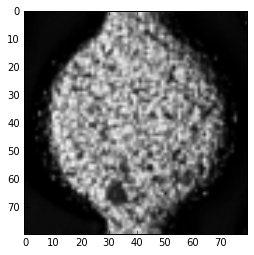

bilateralFilter:


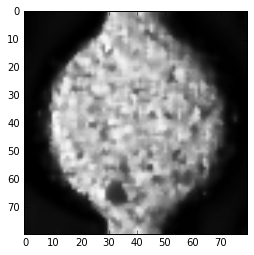

threshold:


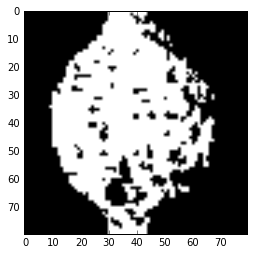

erosion & dilation


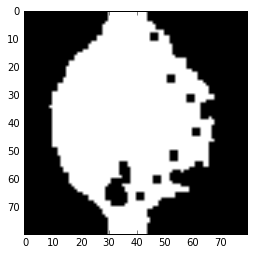

find contours:


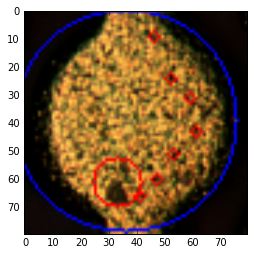

convex hull(green):
hull_area: 3271.5
approx polyDP(pink):
approx_area: 2969.0


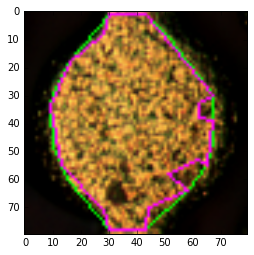

Mask:


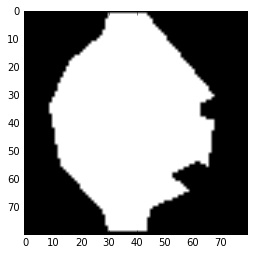

Grab image:


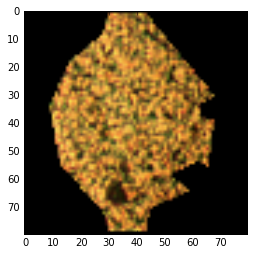

In [15]:
img = getImg('[  804.09844197  2622.09484754]','bad')
grab_img(img)

bilateralFilter:


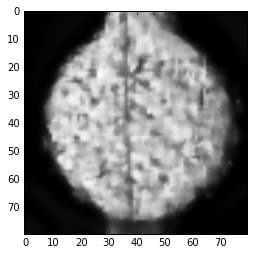

threshold:


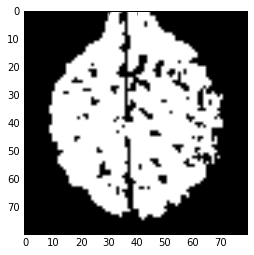

erosion & dilation


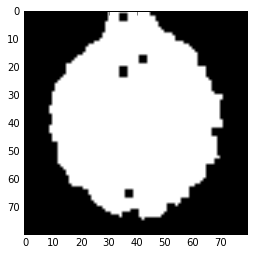

find contours:


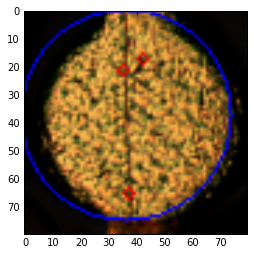

convex hull(green):
hull_area: 3378.0
approx polyDP(pink):
approx_area: 3202.0


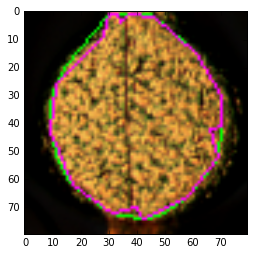

Mask:


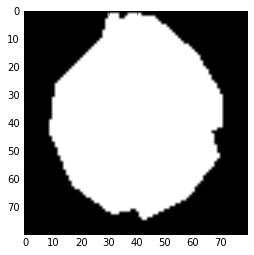

Grab image:


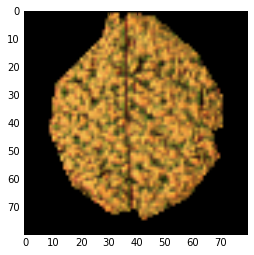

In [17]:
img = cv2.imread('bad_nochinese_[ 3834.39455622  3895.26182746].bmp')
grab_img(img)

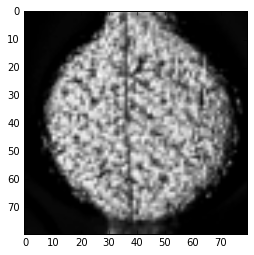

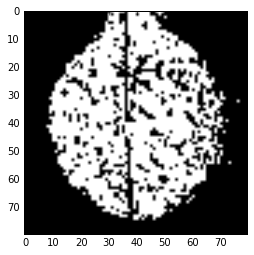

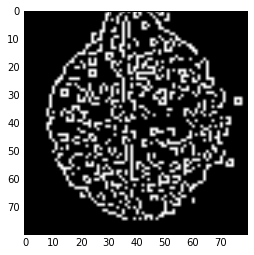

[72  9 79  2]
[15 16 65 66]
[ 5 79  7 77]
[14 62 63 13]
[12 61 35 38]
[18 66 67 17]
[12 78 19 71]
[16 64 65 15]
[ 8  3 15 10]
[ 9 57 57  9]
[20 68 68 20]
[46 44 66 64]
[12  0 19  7]
[21 12 69 60]
[13 18 33 38]
[12 58 59 11]
[24 69 45 48]


C:\Users\160619\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


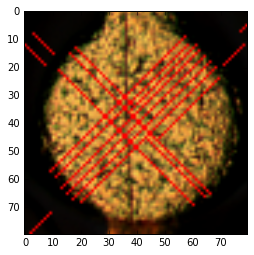

In [8]:
img = cv2.imread('bad_nochinese_[ 3834.39455622  3895.26182746].bmp')
gray = grayImg(img)
plt.imshow(gray, 'gray')
plt.show()

ret,output = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
plt.imshow(output,'gray')
plt.show()

canny = cv2.Canny(output, 100, 150)
#sobel = Sobel(output)
plt.imshow(canny,'gray')
plt.show()

lines = cv2.HoughLinesP(gray, 1, np.pi/180, 110)

copy = img.copy()
if lines != None:
    for line in lines[0]:
        print line
        cv2.line(copy, (line[1],line[0]), (line[3],line[2]), (0,0,255), 1)
    plt_show(copy,'color')
else:
    print "No line was detected"

img.shape: (80L, 80L, 3L)
gray scale:


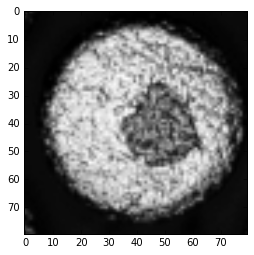

signal frequency spectrum


(<matplotlib.axes._subplots.AxesSubplot at 0x9054dd8>,
 <matplotlib.text.Text at 0xd010f60>)

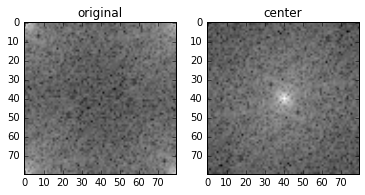

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#signal frequency spectrum

#img = cv2.imread('flower.jpg',0) #直接读为灰度图像
img = getImg('[ 7680.61233222  2654.24611877]','bad')
img = grayImg(img)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
print 'signal frequency spectrum'
plt.subplot(121),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(s2,'gray'),plt.title('center')

img.shape: (80L, 80L, 3L)
gray scale:


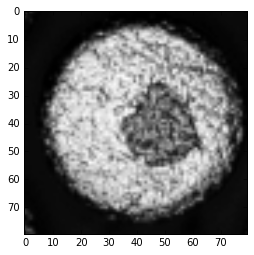

(<matplotlib.axes._subplots.AxesSubplot at 0x82989e8>,
 <matplotlib.text.Text at 0x91d2828>)

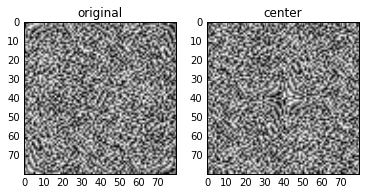

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#phase spectrum

#img = cv2.imread('flower.jpg',0) #直接读为灰度图像
img = getImg('[ 7680.61233222  2654.24611877]','bad')
img = grayImg(img)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

ph_f = np.angle(f)
ph_fshift = np.angle(fshift)

print 'spatial phase spectrum'
plt.subplot(121),plt.imshow(ph_f,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(ph_fshift,'gray'),plt.title('center')

原始影像


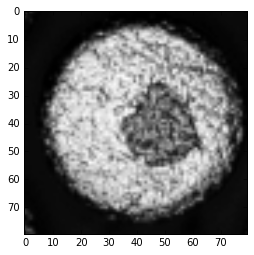

frequency spectrum


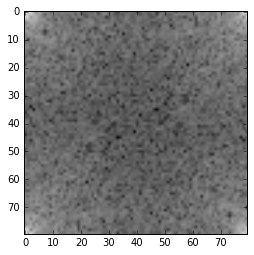

central frequency spectrum


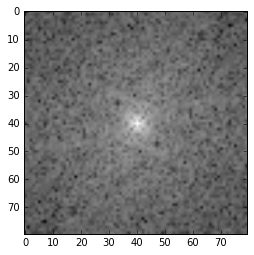

phase spectrum


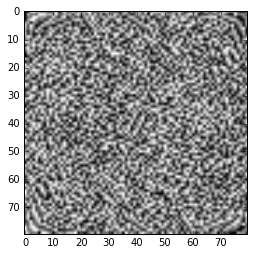

central phase spectrum


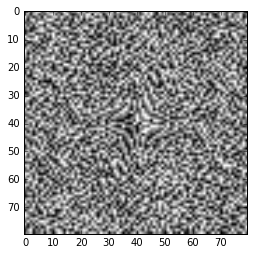

ifft image


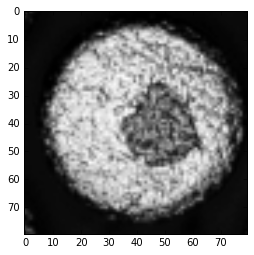

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#img = cv2.imread('flower.jpg',0) #直接读为灰度图像
img = getImg('[ 7680.61233222  2654.24611877]','bad')
print '原始影像'
plt.imshow(grayImg(img), 'gray')
plt.show()

# FFT
img = grayImg(img)
f = np.fft.fft2(img)

f_spectrum = np.log(np.abs(f))
print 'frequency spectrum'
plt.imshow(f_spectrum, 'gray')
plt.show()

#頻譜中心化
f_shift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到0-255
s1 = np.log(np.abs(f_shift))
print 'central frequency spectrum'
plt.imshow(s1, 'gray')
plt.show()

# phase spectrum
ph_f = np.angle(f)
print 'phase spectrum'
plt.imshow(ph_f, 'gray')
plt.show()

# central phase spectrum
ph_fshift = np.angle(f_shift)
print 'central phase spectrum'
plt.imshow(ph_fshift, 'gray')
plt.show()

# 逆变换
f1shift = np.fft.ifftshift(f_shift)
img_back = np.fft.ifft2(f1shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))

print 'ifft image'
plt.imshow(img_back,'gray')
plt.show()

In [44]:
#! /usr/bin/env python
#coding=utf-8
 
import cv2
import numpy as np
 
'''
opencv 理想滤波、巴特沃兹滤波和高斯滤波的高通、低通滤波演示
 
    Filter Parameters 窗口： 滤波器参数窗口
        - d0: 滤波器大小 D0
        - flag: 滤波器类型
             0 - 理想滤波
             1 - 巴特沃兹滤波
             2 - 高斯滤波
        - n: 巴特沃兹滤波的阶数
        - lh: 低通滤波 or 高通滤波
 
    Filtered Image 窗口: 过滤后的图像和过滤器图像
'''
 
def combine_images(images, axis=1):
    '''
    合并图像。
 
    @param images: 图像列表(图像成员的维数必须相同)
    @param axis: 合并方向。 
        axis=0时，图像垂直合并;
        axis = 1 时， 图像水平合并。
    @return 合并后的图像
    '''
    ndim = images[0].ndim

    shapes = np.array([mat.shape for mat in images])

    assert np.all(map(lambda e: len(e)==ndim, shapes)), 'all images should be same ndim.'

    if axis == 0:# 垂直方向合并图像
        # 合并图像的 cols
        cols = np.max(shapes[:, 1])
        # 扩展各图像 cols大小，使得 cols一致
        copy_imgs = [cv2.copyMakeBorder(img, 0, 0, 0, cols-img.shape[1], 
            cv2.BORDER_CONSTANT, (0,0,0))  for img in images]
        # 垂直方向合并
        return np.vstack(copy_imgs)
    else:# 水平方向合并图像
        # 合并图像的 rows
        rows = np.max(shapes[:, 0])
        # 扩展各图像rows大小，使得 rows一致
        copy_imgs = [cv2.copyMakeBorder(img, 0, rows-img.shape[0], 0, 0, 
            cv2.BORDER_CONSTANT, (0,0,0))  for img in images]
        # 水平方向合并
        return np.hstack(copy_imgs)

def fft(img):
    '''对图像进行傅立叶变换，并返回换位后的频率矩阵'''
    assert img.ndim==2, 'img should be gray.'

    rows, cols = img.shape[:2]

    # 计算最优尺寸
    nrows = cv2.getOptimalDFTSize(rows)
    ncols = cv2.getOptimalDFTSize(cols)

    # 根据新尺寸，建立新变换图像
    nimg = np.zeros((nrows, ncols))
    nimg[:rows,:cols] = img

    # 傅立叶变换
    fft_mat = cv2.dft(np.float32(nimg), flags=cv2.DFT_COMPLEX_OUTPUT)

    # 换位，低频部分移到中间，高频部分移到四周
    return np.fft.fftshift(fft_mat)
 

def fft_image(fft_mat):
    '''将频率矩阵转换为可视图像'''
    # log函数中加1，避免log(0)出现.
    log_mat= cv2.log(1 + cv2.magnitude(fft_mat[:,:,0], fft_mat[:,:,1]))

    # 标准化到0~255之间
    cv2.normalize(log_mat, log_mat, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(np.around(log_mat))
 

def ifft(fft_mat):
    '''傅立叶反变换，返回反变换图像'''
    # 反换位，低频部分移到四周，高频部分移到中间
    f_ishift_mat = np.fft.ifftshift(fft_mat)

    # 傅立叶反变换
    img_back = cv2.idft(f_ishift_mat)

    # 将复数转换为幅度, sqrt(re^2 + im^2)
    img_back = cv2.magnitude(*cv2.split(img_back))

    # 标准化到0~255之间
    cv2.normalize(img_back, img_back, 0, 255, cv2.NORM_MINMAX) 
    return np.uint8(np.around(img_back))
 

def fft_distances(m, n):
    '''
    计算m,n矩阵每一点距离中心的距离
    见《数字图像处理MATLAB版.冈萨雷斯》93页
    '''
    u = np.array([i if i<=m/2 else m-i for i in range(m)], dtype=np.float32)
    v = np.array([i if i<=m/2 else m-i for i in range(m)], dtype=np.float32)
    v.shape = n, 1

    # 每点距离矩阵左上角的距离
    ret = np.sqrt(u*u + v*v)

    # 每点距离矩阵中心的距离
    return np.fft.fftshift(ret)
 

def lpfilter(flag, rows, cols, d0, n):
    '''低通滤波器
    @param flag: 滤波器类型
        0 - 理想低通滤波
        1 - 巴特沃兹低通滤波
        2 - 高斯低通滤波
    @param rows: 被滤波的矩阵高度
    @param cols: 被滤波的矩阵宽度
    @param d0: 滤波器大小 D0
    @param n: 巴特沃兹低通滤波的阶数  
    @return 滤波器矩阵 
    '''
    assert d0 > 0, 'd0 should be more than 0.'

    filter_mat = None

    #理想低通滤波
    if flag == 0: 
        filter_mat = np.zeros((rows, cols ,2), np.float32)
        cv2.circle(filter_mat, (rows/2, cols/2) , d0, (1,1,1), thickness=-1)  

    # 巴特沃兹低通滤波
    elif flag == 1: 
        duv = fft_distances(*fft_mat.shape[:2])
        filter_mat = 1 / (1+ np.power(duv/d0, 2*n)) 
        # fft_mat有2个通道，实部和虚部
        # fliter_mat 也需要2个通道
        filter_mat =cv2.merge((filter_mat, filter_mat)) 

    #高斯低通滤波
    else: 
        duv = fft_distances(*fft_mat.shape[:2])
        filter_mat = np.exp(-(duv*duv) / (2*d0*d0))
        # fft_mat有2个通道，实部和虚部
        # fliter_mat 也需要2个通道
        filter_mat = cv2.merge((filter_mat, filter_mat))                  

    return filter_mat


def hpfilter(flag, rows, cols, d0, n):
    '''高通滤波器
    @param flag: 滤波器类型
        0 - 理想高通滤波
        1 - 巴特沃兹高通滤波
        2 - 高斯高通滤波
    @param rows: 被滤波的矩阵高度
    @param cols: 被滤波的矩阵宽度
    @param d0: 滤波器大小 D0
    @param n: 巴特沃兹高通滤波的阶数  
    @return 滤波器矩阵 
    '''
    assert d0 > 0, 'd0 should be more than 0.'

    filter_mat = None

    #理想高通滤波
    if flag == 0: 
        filter_mat = np.ones((rows, cols ,2), np.float32)
        cv2.circle(filter_mat, (rows/2, cols/2) , d0, (0,0,0), thickness=-1)  

    # 巴特沃兹高通滤波
    elif flag == 1: 
        duv = fft_distances(rows, cols)

        # duv有 0 值(中心距离中心为0)， 为避免除以0，设中心为 0.000001
        duv[rows/2, cols/2] = 0.000001

        filter_mat = 1 / (1+ np.power(d0/duv, 2*n)) 
        # fft_mat有2个通道，实部和虚部
        # fliter_mat 也需要2个通道
        filter_mat =cv2.merge((filter_mat, filter_mat)) 

    #高斯高通滤波
    else: 
        duv = fft_distances(*fft_mat.shape[:2])
        filter_mat = 1 - np.exp(-(duv*duv) / (2*d0*d0))
        # fft_mat有2个通道，实部和虚部
        # fliter_mat 也需要2个通道
        filter_mat = cv2.merge((filter_mat, filter_mat))                  

    return filter_mat


def do_filter(_=None):
    '''滤波，并显示'''
    d0 = cv2.getTrackbarPos('d0', filter_win)
    flag = cv2.getTrackbarPos('flag', filter_win)
    n = cv2.getTrackbarPos('n', filter_win)
    lh = cv2.getTrackbarPos('lh', filter_win)

    # 滤波器
    filter_mat = None
    if lh == 0:
        filter_mat = lpfilter(flag, fft_mat.shape[0], fft_mat.shape[1], d0, n)
    else:
        filter_mat = hpfilter(flag, fft_mat.shape[0], fft_mat.shape[1], d0, n)

    # 进行滤波
    filtered_mat = filter_mat * fft_mat

    # 反变换
    img_back = ifft(filtered_mat)

    # 显示滤波后的图像和滤波器图像
    cv2.imshow(image_win, combine_images([img_back, fft_image(filter_mat)]))

    
if __name__ == '__main__':
    #img = cv2.imread('images/Fig0515.jpg',0)
    img = getImg('[ 7680.61233222  2654.24611877]','bad')
    img = grayImg(img)
    rows, cols = img.shape[:2]

    # 滤波器窗口名称
    filter_win = 'Filter Parameters'
    # 图像窗口名称
    image_win = 'Filtered Image'

    cv2.namedWindow(filter_win)
    cv2.namedWindow(image_win)

    # 创建d0 tracker, d0为过滤器大小
    cv2.createTrackbar('d0', filter_win, 20, min(rows, cols)/4, do_filter)

    # 创建flag tracker,
    # flag=0时，为理想滤波
    # flag=1时，为巴特沃兹滤波
    # flag=2时，为高斯滤波
    cv2.createTrackbar('flag', filter_win, 0, 2, do_filter)

    # 创建n tracker
    # n 为巴特沃兹滤波的阶数
    cv2.createTrackbar('n', filter_win, 1, 5, do_filter)

    # 创建lh tracker
    # lh: 滤波器是低通还是高通， 0 为低通， 1为高通
    cv2.createTrackbar('lh', filter_win, 0, 1, do_filter)

    fft_mat = fft(img)

    do_filter()

    cv2.resizeWindow(filter_win, 512, 20)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

C:\Users\160619\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:186: RuntimeWarning: overflow encountered in power
